# **Data analysis for the 3 datasets**

Synthesis of the 3 other notebooks

## **Preliminary steps**

In [1]:
import os 
print(os.getcwd())
os.chdir('ml-for-nlp')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project 
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [2]:
### PACKAGES

import pandas as pd
import numpy as np

In [3]:
### FUNCTIONS
from src.libs import preprocessing, visualization

from src.configs import names, constants

In [4]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [5]:
### LOAD DATA

# STORY
df_gpt_story = preprocessing.load_dataset(source="GPT", type="STORY")
df_bard_story = preprocessing.load_dataset(source="BARD", type="STORY")
df_human_story = preprocessing.load_dataset(source="Human", type="STORY")

# ESSAY
df_gpt_essay = preprocessing.load_dataset(source="GPT", type="ESSAY")
df_bard_essay = preprocessing.load_dataset(source="BARD", type="ESSAY")
df_human_essay = preprocessing.load_dataset(source="Human", type="ESSAY")

# POETRY
df_gpt_poetry = preprocessing.load_dataset(source="GPT", type="POETRY")
df_bard_poetry = preprocessing.load_dataset(source="BARD", type="POETRY")
df_human_poetry = preprocessing.load_dataset(source="Human", type="POETRY")


Time taken to load dataset: 0.03202199935913086 seconds
Time taken to load dataset: 0.011403083801269531 seconds
Time taken to load dataset: 0.00994110107421875 seconds
Time taken to load dataset: 0.007467985153198242 seconds
Time taken to load dataset: 0.006165981292724609 seconds
Time taken to load dataset: 0.06972289085388184 seconds
Time taken to load dataset: 0.004724025726318359 seconds
Time taken to load dataset: 0.003606081008911133 seconds
Time taken to load dataset: 0.2456960678100586 seconds


In [6]:
### GET TRAIN SPLIT
# STORY
df_train_gpt_story, _ = preprocessing.train_valid_split(df_gpt_story)
df_train_bard_story, _ = preprocessing.train_valid_split(df_bard_story)
df_train_human_story, _ = preprocessing.train_valid_split(df_human_story)

# ESSAY
df_train_gpt_essay, _ = preprocessing.train_valid_split(df_gpt_essay)
df_train_bard_essay, _ = preprocessing.train_valid_split(df_bard_essay)
df_train_human_essay, _ = preprocessing.train_valid_split(df_human_essay)

# POETRY
df_train_gpt_poetry, _ = preprocessing.train_valid_split(df_gpt_poetry)
df_train_bard_poetry, _ = preprocessing.train_valid_split(df_bard_poetry)
df_train_human_poetry, _ = preprocessing.train_valid_split(df_human_poetry)

In [7]:
import matplotlib.pyplot as plt 
from typing import Literal

In [8]:
df_train_story = preprocessing.get_story_dataset(df_train_gpt_story, df_train_bard_story, df_train_human_story, samples_per_source=500)
df_train_essay = preprocessing.get_essay_dataset(df_train_gpt_essay, df_train_bard_essay, df_train_human_essay, samples_per_source=500)
df_train_poetry = preprocessing.get_poetry_dataset(df_train_gpt_poetry, df_train_bard_poetry, df_train_human_poetry, samples_per_source=500)

## **Plot number of words per genre**

In [9]:
def plot_histogram_sentence_length(
    sentence_lengths: np.ndarray,
    labels: np.ndarray,
    type: Literal["words", "characters"] = "words",
    data_type: str="story",
) -> None:
    import matplotlib as mpl
    mpl.rcParams["text.usetex"] = False
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10, 6))

    hist_range = (0, 1000) if type == "words" else (0, 10000)

    plt.hist(
        sentence_lengths[labels == 0],
        range=hist_range,
        bins=20,
        alpha=0.5,
        label="Human",
        color="#1f77b4",  
    )
    plt.hist(
        sentence_lengths[labels == 1],
        range=hist_range,
        bins=20,
        alpha=0.5,
        label="GPT",
        color="#d62728",  
    )
    plt.hist(
        sentence_lengths[labels == 2],
        range=hist_range,
        bins=20,
        alpha=0.5,
        label="BARD",
        color="#ffcc00", 
    )

    plt.title(f"Sentence lengths (in number of {type}) for Dataset {data_type}")
    plt.xlabel(f"Sentence length (in number of {type})")
    plt.ylabel("Frequency out of 500 per genre")
    plt.grid(axis="both", which="major", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


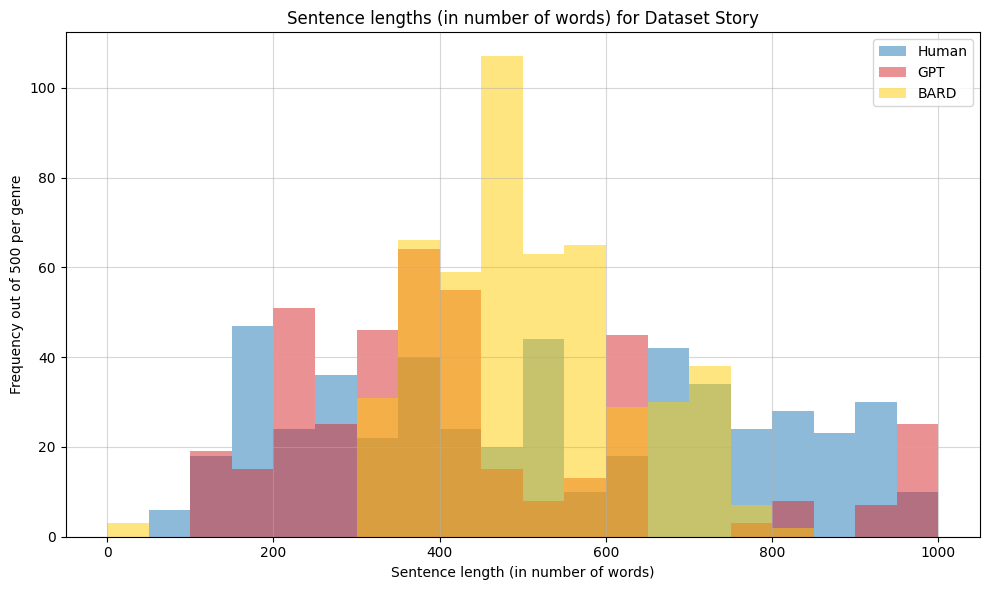

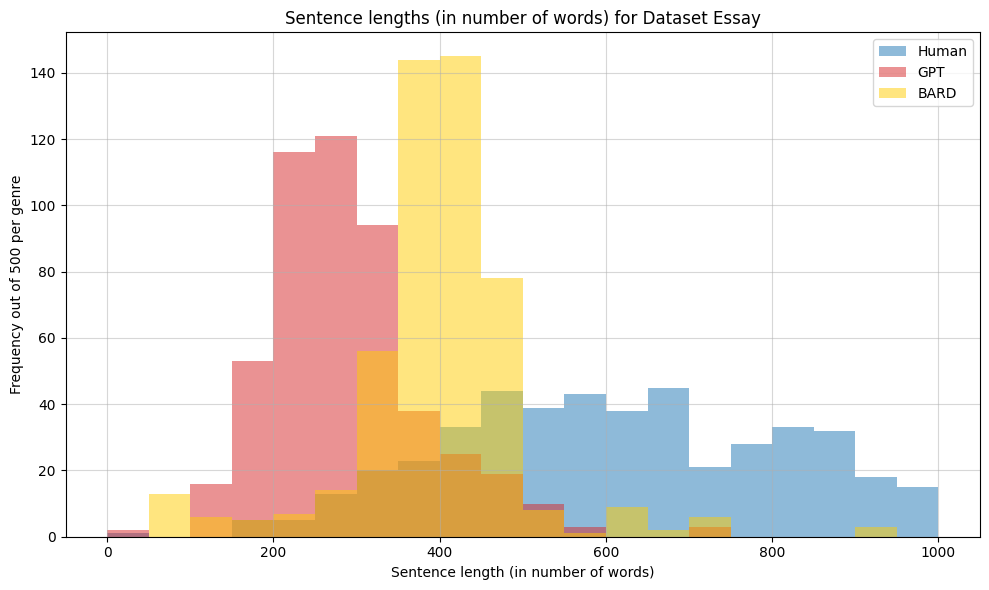

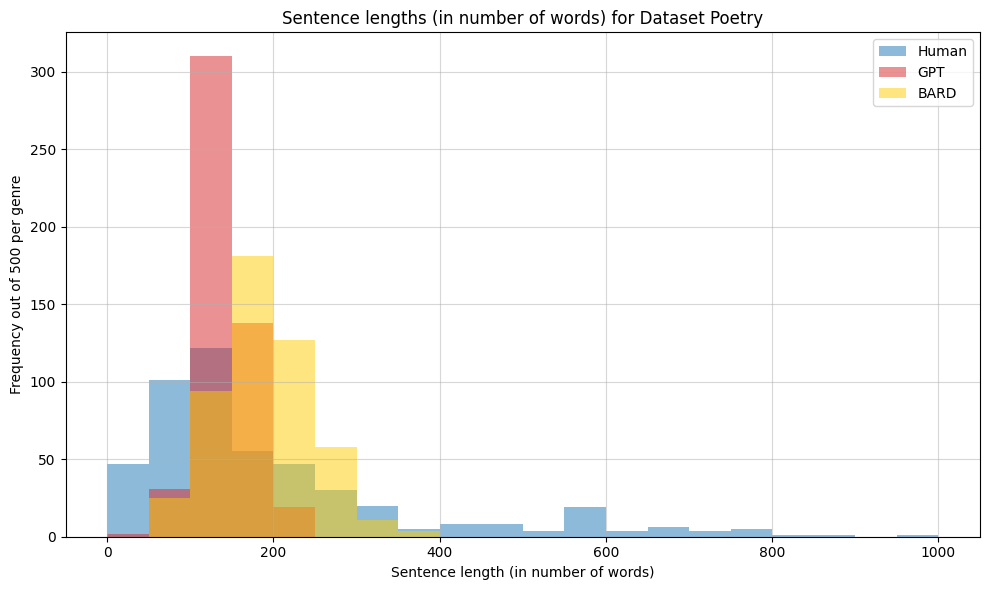

In [10]:
data_types = ["Story", "Essay", "Poetry"]
df_genres = [df_train_story, df_train_essay, df_train_poetry]

for data_type, df in zip(data_types, df_genres):
    df_train = df.copy()
    sentence_lengths_words = np.array(df_train[names.TEXT].str.split().str.len())
    plot_histogram_sentence_length(
        sentence_lengths=sentence_lengths_words, labels=df_train[names.LABEL], type="words", data_type=data_type
    )

## **WordCloud**

In [11]:
from src.configs import names, constants
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.update(["s"])

In [12]:
data_types = ["Story", "Essay", "Poetry"]
df_genres = [df_train_story, df_train_essay, df_train_poetry]

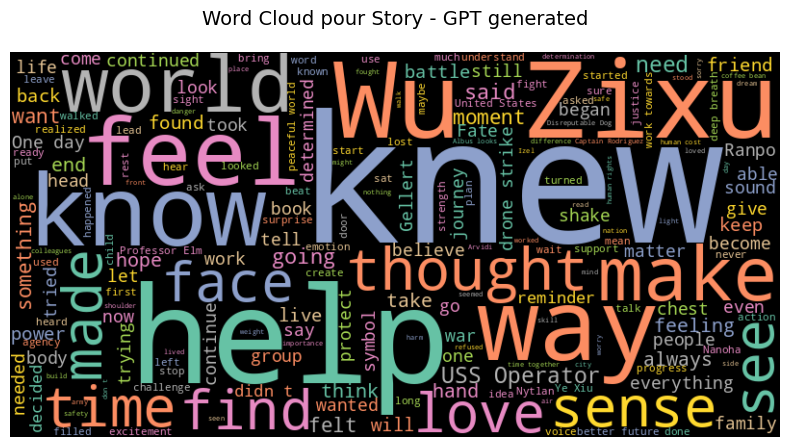

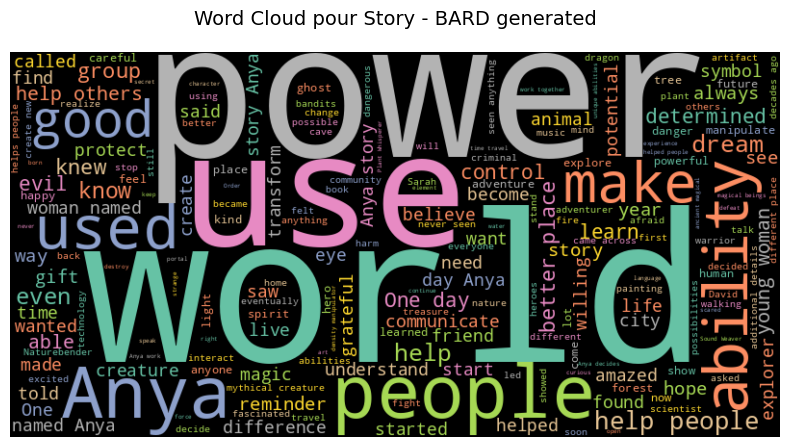

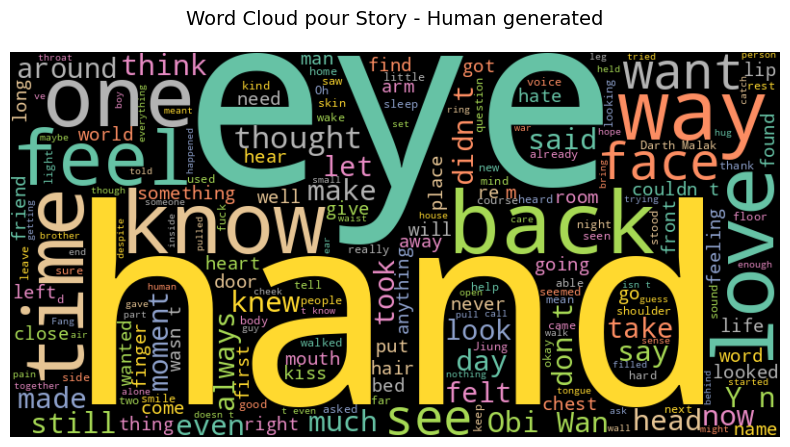

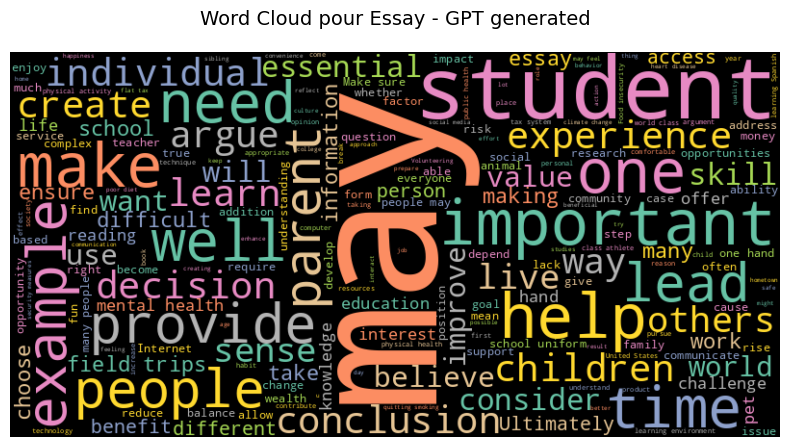

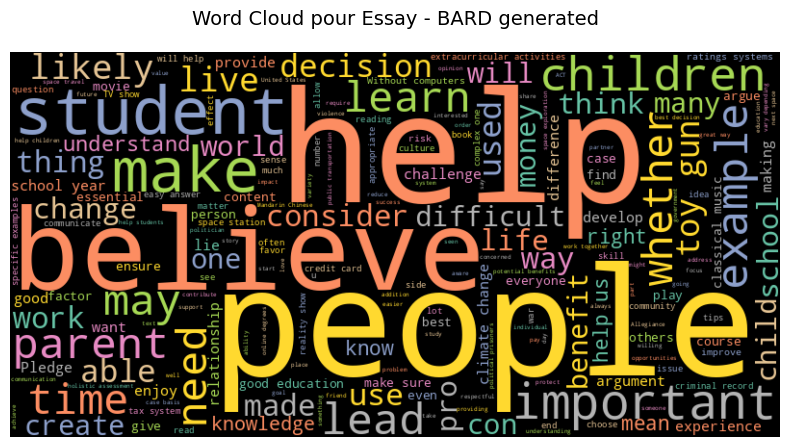

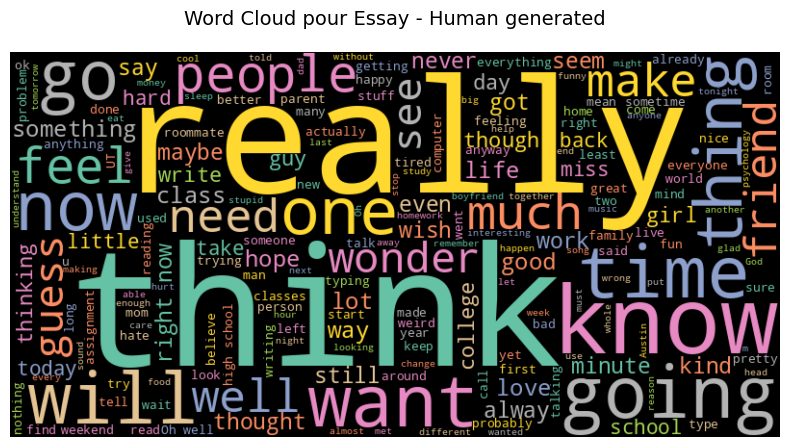

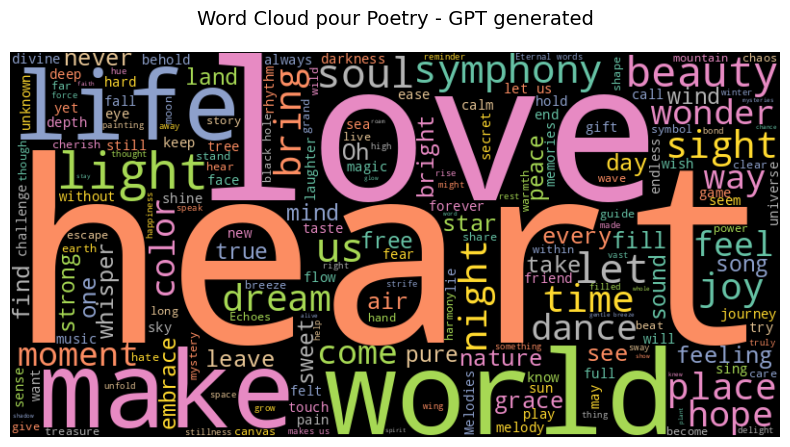

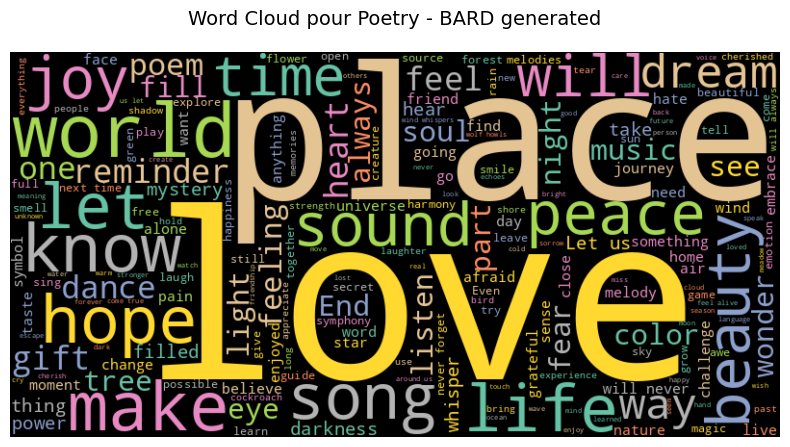

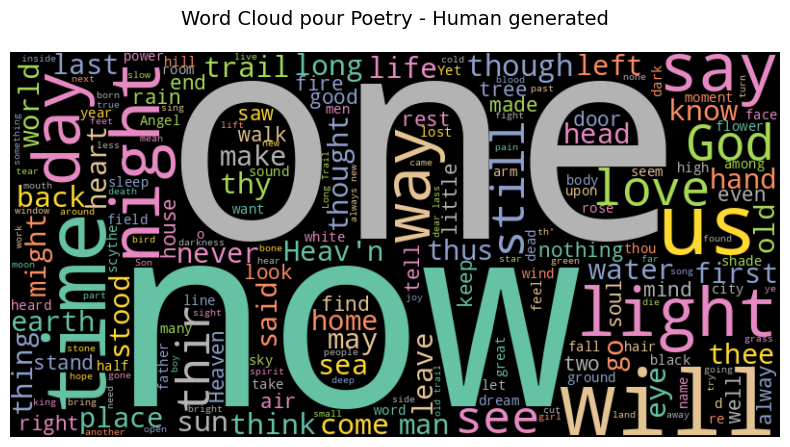

In [13]:
label_names = {
    constants.GPT_LABEL: "GPT generated",
    constants.BARD_LABEL: "BARD generated",
    constants.HUMAN_LABEL: "Human generated"
}

for genre, df in zip(data_types, df_genres):
    df_train = df.copy()
    for label_value, label_text in label_names.items():
        subset = df_train[df_train["label"] == label_value]
        text = " ".join(subset["text"])

        if text.strip() == "":
            continue

        wordcloud = WordCloud(
            background_color='black',
            width=800,
            height=400,
            colormap='Set2',
            stopwords=STOPWORDS
        ).generate(text)

        plt.figure(figsize=(8, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud pour {genre} - {label_text}", fontsize=14, color='black', pad=20)
        plt.tight_layout()
        plt.show()
